<a href="https://colab.research.google.com/github/potatosoupx/python/blob/main/phydionet_PTB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import scipy.signal as signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from sklearn.model_selection import train_test_split
%matplotlib inline

In [36]:
Data1 = pd.read_csv('s0014lre.csv',engine='python',header=0)
headers = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']
Data1.columns = headers
Data1

i      ii     iii     avr     avl     avf      v1      v2  \
0      -0.4440 -0.0320  0.4125  0.2380 -0.4285  0.1910  1.2575  1.2845   
1      -0.4555 -0.0345  0.4220  0.2455 -0.4390  0.1940  1.2560  1.2820   
2      -0.4620 -0.0310  0.4320  0.2465 -0.4475  0.2005  1.2560  1.2775   
3      -0.4590 -0.0180  0.4420  0.2390 -0.4510  0.2120  1.2605  1.2760   
4      -0.4685 -0.0215  0.4480  0.2455 -0.4590  0.2135  1.2545  1.2705   
...        ...     ...     ...     ...     ...     ...     ...     ...   
115194 -0.1690  1.3640  1.5335 -0.5975 -0.8515  1.4490  0.6915  0.6405   
115195 -0.1975  1.3625  1.5605 -0.5825 -0.8795  1.4620  0.7090  0.6465   
115196 -0.2395  1.3605  1.6005 -0.5605 -0.9205  1.4810  0.7315  0.6565   
115197 -0.3130  1.3860  1.6995 -0.5365 -1.0065  1.5430  0.7625  0.6690   
115198 -0.3560  1.3985  1.7550 -0.5215 -1.0560  1.5775  0.7685  0.6635   

            v3      v4      v5      v6      vx      vy      vz  
0      -0.9290 -0.8215  1.6195  1.7120  0.5335 -1.1385  0.9645  
1      -0.9360 -0.8240  1.6195  1.7125  0.5305 -1.1410  0.9610  
2      -0.9420 -0.8280  1.6185  1.7125  0.5310 -1.1330  0.9630  
3      -0.9450 -0.8270  1.6210  1.7165  0.5305 -1.1265  0.9620  
4      -0.9500 -0.8315  1.6205  1.7160  0.5300 -1.1255  0.9595  
...        ...     ...     ...     ...     ...     ...     ...  
115194  0.6130 -0.2300 -0.2600 -0.5095 -0.3280  2.6115 -0.1090  
115195  0.6245 -0.2170 -0.2455 -0.5080 -0.3310  2.6370 -0.1460  
115196  0.6490 -0.1910 -0.2140 -0.4915 -0.3325  2.6525 -0.1920  
115197  0.6795 -0.1525 -0.1710 -0.4625 -0.3415  2.6810 -0.2295  
115198  0.6975 -0.1275 -0.1460 -0.4495 -0.3440  2.7260 -0.2585  

[115199 rows x 15 columns]

In [37]:
Data1['i']

0        -0.4440
1        -0.4555
2        -0.4620
3        -0.4590
4        -0.4685
           ...  
115194   -0.1690
115195   -0.1975
115196   -0.2395
115197   -0.3130
115198   -0.3560
Name: i, Length: 115199, dtype: float64

In [38]:
Data2=Data1.iloc[:10000,:]

In [39]:
Data2

i      ii     iii     avr     avl     avf      v1      v2      v3  \
0    -0.4440 -0.0320  0.4125  0.2380 -0.4285  0.1910  1.2575  1.2845 -0.9290   
1    -0.4555 -0.0345  0.4220  0.2455 -0.4390  0.1940  1.2560  1.2820 -0.9360   
2    -0.4620 -0.0310  0.4320  0.2465 -0.4475  0.2005  1.2560  1.2775 -0.9420   
3    -0.4590 -0.0180  0.4420  0.2390 -0.4510  0.2120  1.2605  1.2760 -0.9450   
4    -0.4685 -0.0215  0.4480  0.2455 -0.4590  0.2135  1.2545  1.2705 -0.9500   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995 -0.1590 -0.3560 -0.1965  0.2575  0.0185 -0.2760  0.9440  0.8085 -0.8420   
9996 -0.1910 -0.3725 -0.1810  0.2815 -0.0055 -0.2765  0.9410  0.8085 -0.8395   
9997 -0.2740 -0.3865 -0.1120  0.3300 -0.0810 -0.2490  0.9600  0.8250 -0.8210   
9998 -0.2600 -0.3835 -0.1230  0.3220 -0.0690 -0.2530  0.9625  0.8260 -0.8215   
9999 -0.1945 -0.3685 -0.1740  0.2815 -0.0105 -0.2710  0.9560  0.8230 -0.8250   

          v4      v5      v6      vx      vy      vz  
0    -0.8215  1.6195  1.7120  0.5335 -1.1385  0.9645  
1    -0.8240  1.6195  1.7125  0.5305 -1.1410  0.9610  
2    -0.8280  1.6185  1.7125  0.5310 -1.1330  0.9630  
3    -0.8270  1.6210  1.7165  0.5305 -1.1265  0.9620  
4    -0.8315  1.6205  1.7160  0.5300 -1.1255  0.9595  
...      ...     ...     ...     ...     ...     ...  
9995 -0.4825  1.2965  1.4240  0.4725 -1.1445  0.8580  
9996 -0.4805  1.2960  1.4220  0.4715 -1.1440  0.8485  
9997 -0.4625  1.3135  1.4415  0.4685 -1.1440  0.8410  
9998 -0.4620  1.3165  1.4450  0.4680 -1.1450  0.8410  
9999 -0.4665  1.3125  1.4390  0.4645 -1.1415  0.8360  

[10000 rows x 15 columns]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


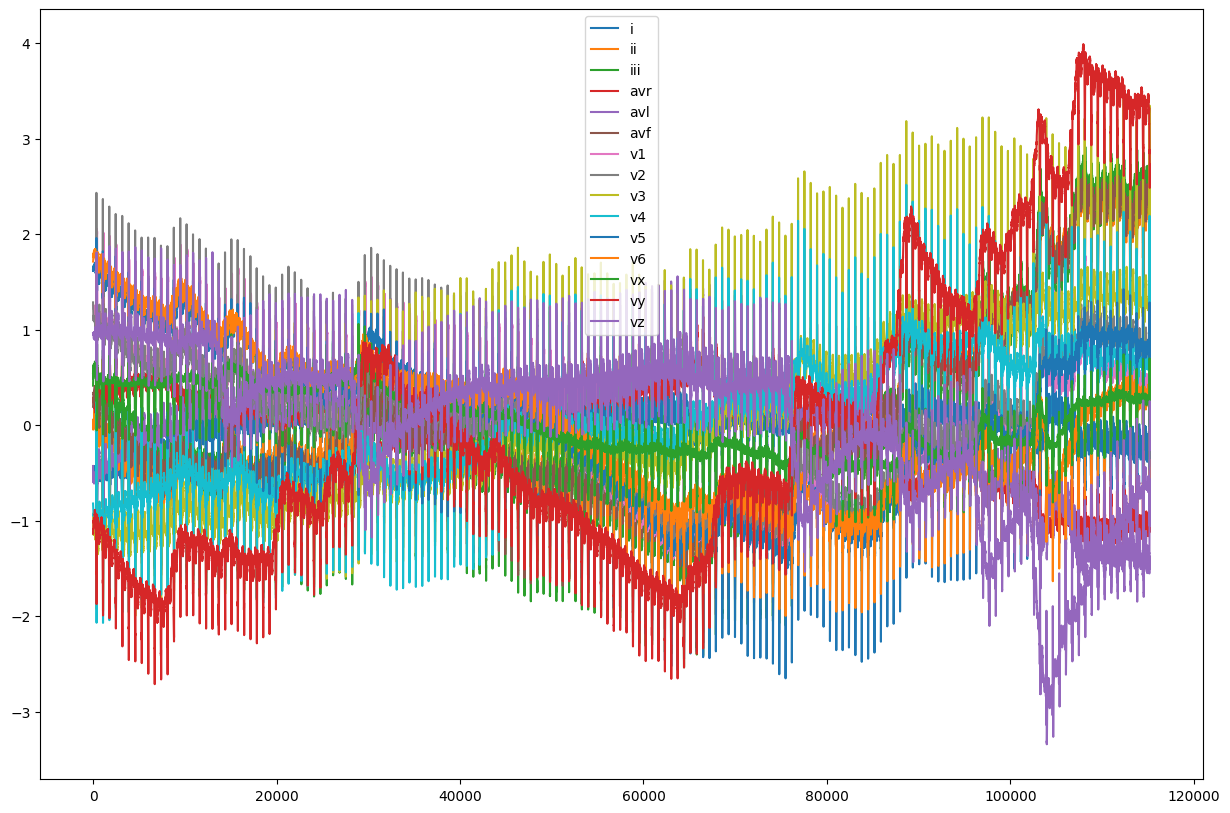

In [40]:
fig = plt.figure(figsize=(15,10))


plt.subplot(111)
plt.plot(Data1)
labels = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']
plt.legend(labels=labels)

plt.show()

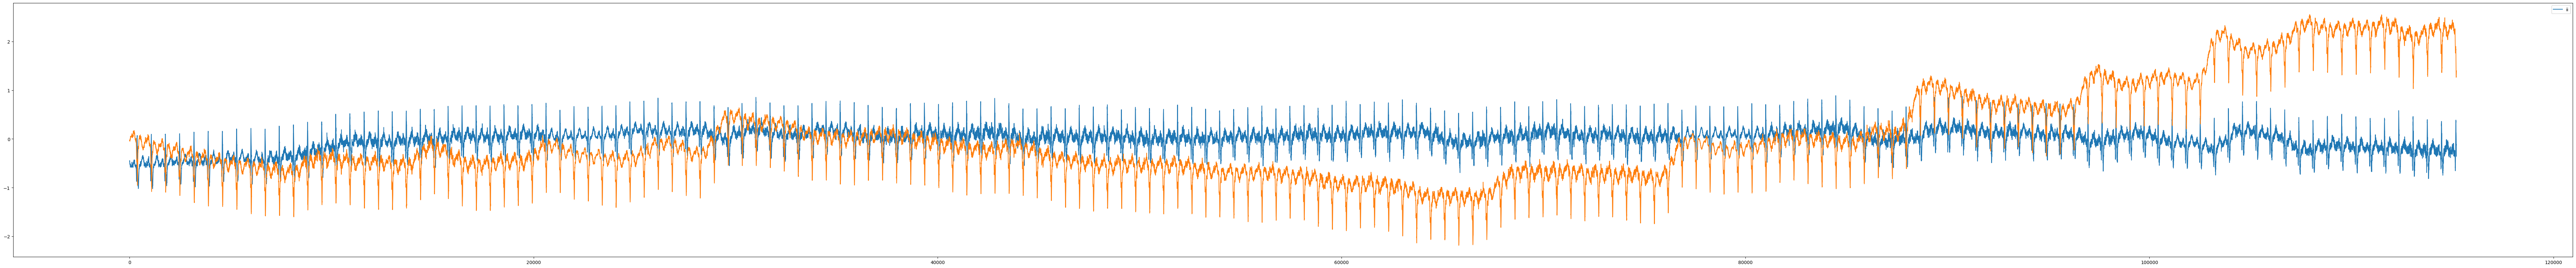

In [41]:
fig = plt.figure(figsize=(100,10))


plt.subplot(111)
plt.plot(Data1['i'])
labels = ['i']
plt.legend(labels=labels)

plt.plot(Data1['ii'])
labels=['ii']
plt.legend(labels=labels)

plt.show()

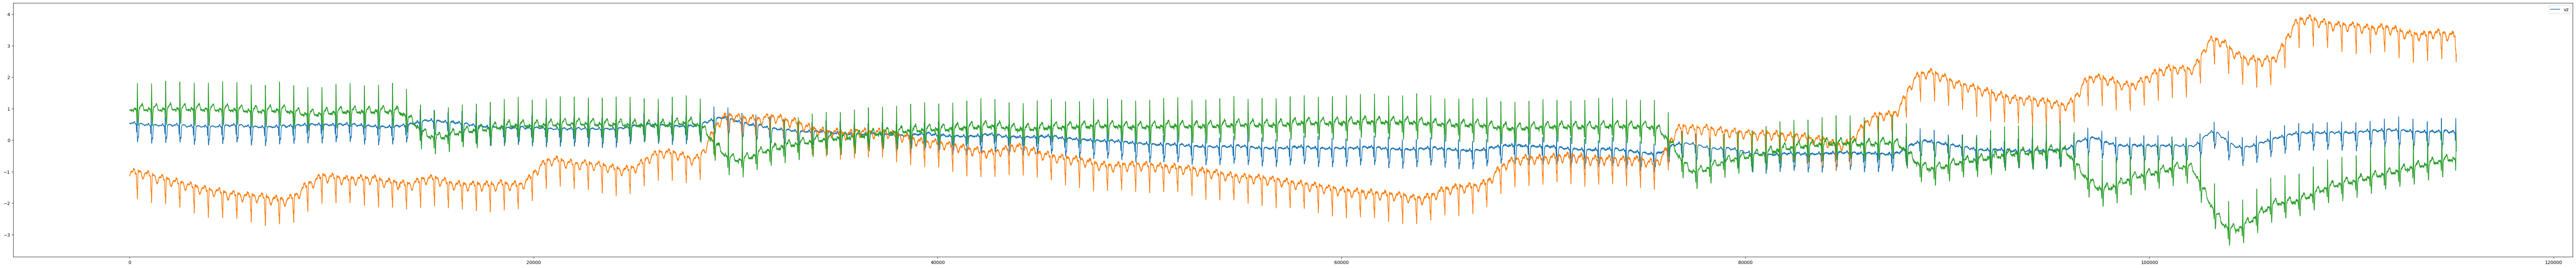

In [42]:
fig = plt.figure(figsize=(100,10))


plt.subplot(111)
plt.plot(Data1['vx'])
labels = ['vx']
plt.legend(labels=labels)

plt.plot(Data1['vy'])
labels=['vy']
plt.legend(labels=labels)

plt.plot(Data1['vz'])
labels=['vz']
plt.legend(labels=labels)

plt.show()

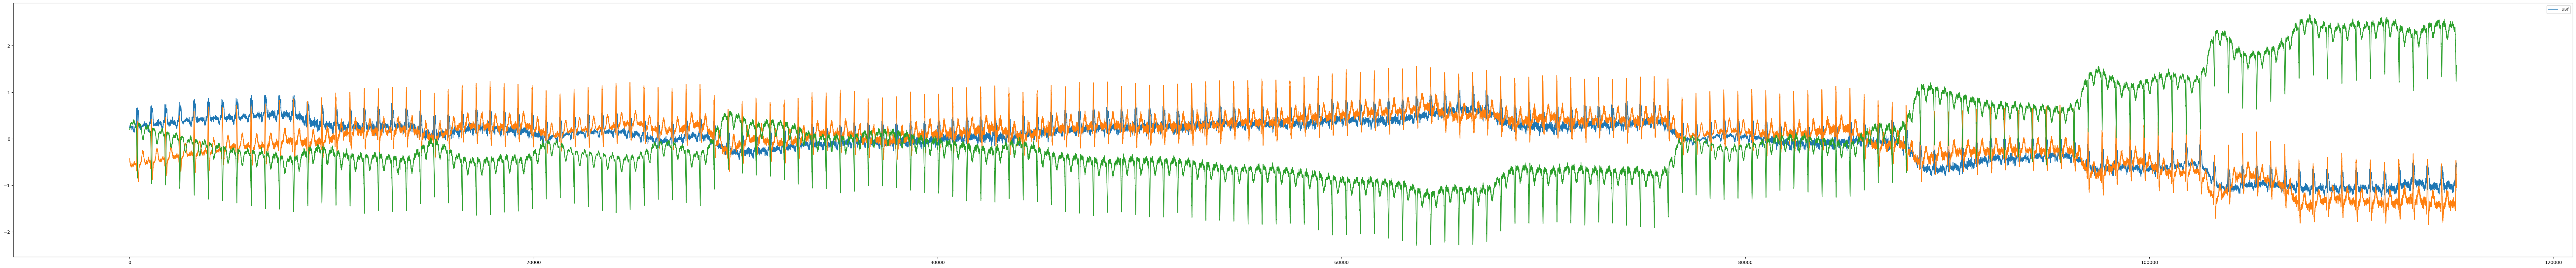

In [43]:
fig = plt.figure(figsize=(100,10))


plt.subplot(111)
plt.plot(Data1['avr'])
labels = ['avr']
plt.legend(labels=labels)

plt.plot(Data1['avl'])
labels=['avl']
plt.legend(labels=labels)

plt.plot(Data1['avf'])
labels=['avf']
plt.legend(labels=labels)

plt.show()

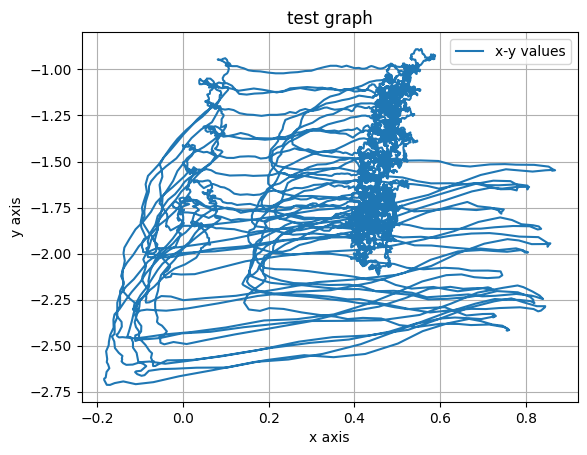

In [59]:
x = np.arange(-10, 11, 1)

plt.title("test graph") # 표 제목 수정
plt.xlabel("x axis")    # x축 제목
plt.ylabel("y axis")    # y축 제목

plt.plot(Data2['vx'], Data2['vy'], label="x-y values")  # plot(x축, y축) , label=계열 제목

plt.legend()    # 범례 추가
# plt.xlim(0, 15) # 처음에 보여지는 x축 설정
# plt.ylim(0,15 ) # 처음에 보여지는 y축 설정
plt.grid(True)  # 눈금 활성화
plt.show()

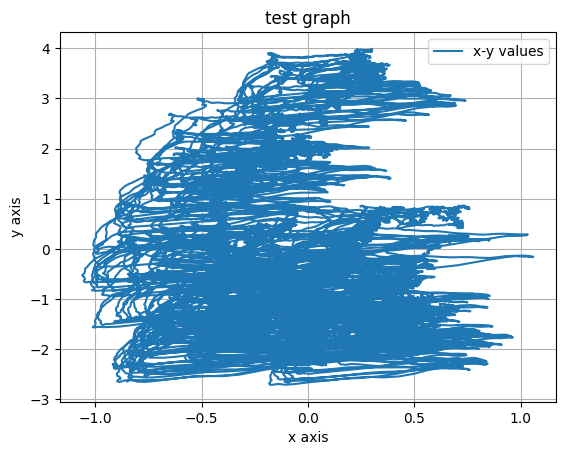

In [58]:
x = np.arange(-10, 11, 1)

plt.title("test graph") # 표 제목 수정
plt.xlabel("x axis")    # x축 제목
plt.ylabel("y axis")    # y축 제목

plt.plot(Data1['vx'], Data1['vy'], label="x-y values")  # x축과 y축 매개변수 위치 바꾸면 그래프 모양 달라짐!

plt.legend()    # 범례 추가
# plt.xlim(-2.5, 4) # 처음에 보여지는 x축 설정
# plt.ylim(-2.5, 4) # 처음에 보여지는 y축 설정
plt.grid(True)  # 눈금 활성화
plt.show()

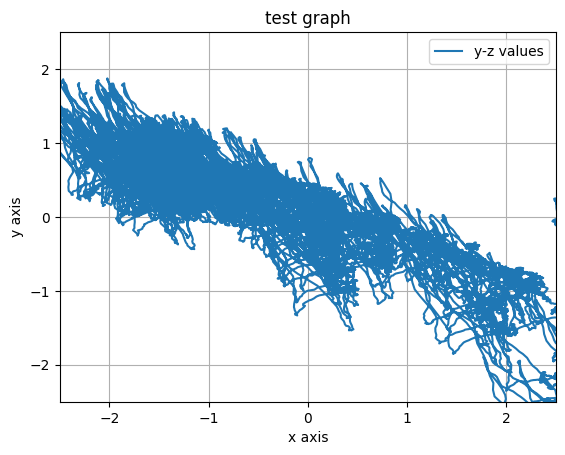

In [46]:
x = np.arange(-10, 11, 0.1)

plt.title("test graph") # 표 제목 수정
plt.xlabel("x axis")    # x축 제목
plt.ylabel("y axis")    # y축 제목

plt.plot(Data1['vy'], Data1['vz'], label="y-z values")  # x축과 y축 매개변수 위치 바꾸면 그래프 모양 달라짐!

plt.legend()    # 범례 추가
plt.xlim(-2.5, 2.5) # 처음에 보여지는 x축 설정
plt.ylim(-2.5, 2.5) # 처음에 보여지는 y축 설정
plt.grid(True)  # 눈금 활성화
plt.show()

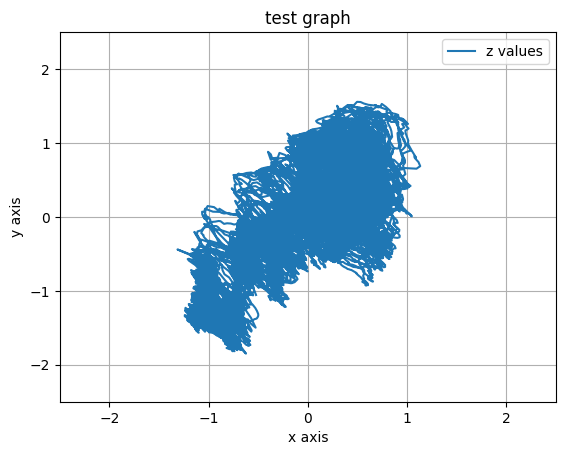

In [47]:
x = np.arange(-10, 11, 0.1)

plt.title("test graph") # 표 제목 수정
plt.xlabel("x axis")    # x축 제목
plt.ylabel("y axis")    # y축 제목

plt.plot(Data1['avr'], Data1['avl'], label="z values")  # x축과 y축 매개변수 위치 바꾸면 그래프 모양 달라짐!

plt.legend()    # 범례 추가
plt.xlim(-2.5, 2.5) # 처음에 보여지는 x축 설정
plt.ylim(-2.5, 2.5) # 처음에 보여지는 y축 설정
plt.grid(True)  # 눈금 활성화
plt.show()

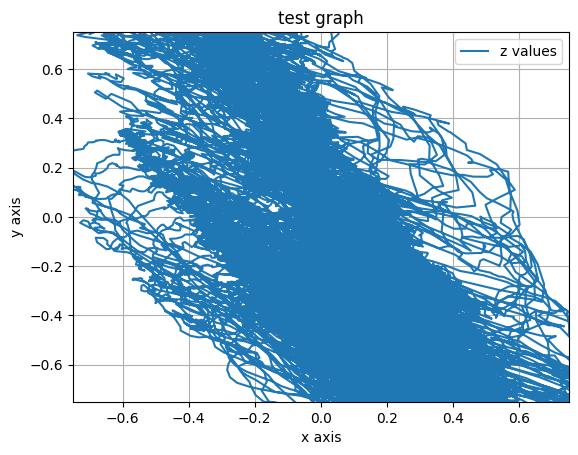

In [48]:
x = np.arange(-10, 11, 0.1)

plt.title("test graph") # 표 제목 수정
plt.xlabel("x axis")    # x축 제목
plt.ylabel("y axis")    # y축 제목

plt.plot(Data1['avl'], Data1['avf'], label="z values")  # x축과 y축 매개변수 위치 바꾸면 그래프 모양 달라짐!

plt.legend()    # 범례 추가
plt.xlim(-0.75, 0.75) # 처음에 보여지는 x축 설정
plt.ylim(-0.75, 0.75) # 처음에 보여지는 y축 설정
plt.grid(True)  # 눈금 활성화
plt.show()

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

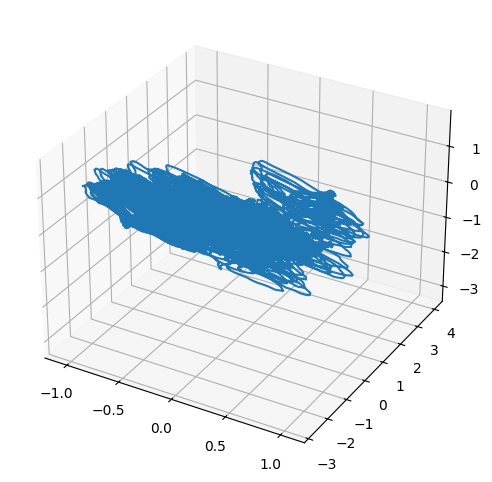

In [50]:
import numpy as np
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
x = Data1['vx']
y = Data1['vy']
z = Data1['vz']
ax.plot(x, y, z)

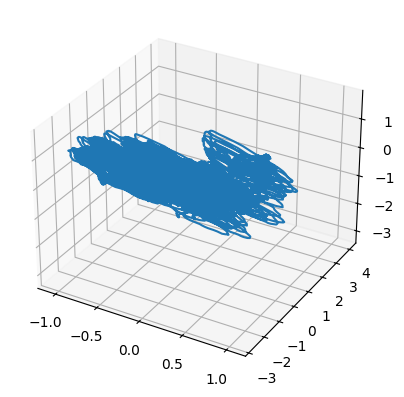

In [51]:
x = Data1['vx']
y = Data1['vy']
z = Data1['vz']

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')

axes.plot(x, y, z)

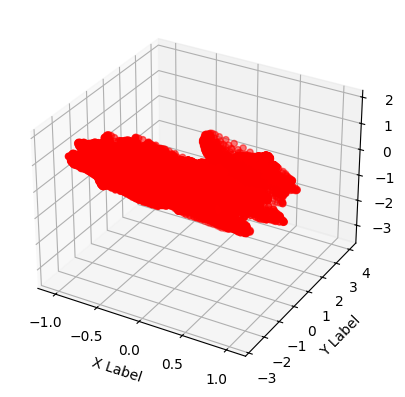

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

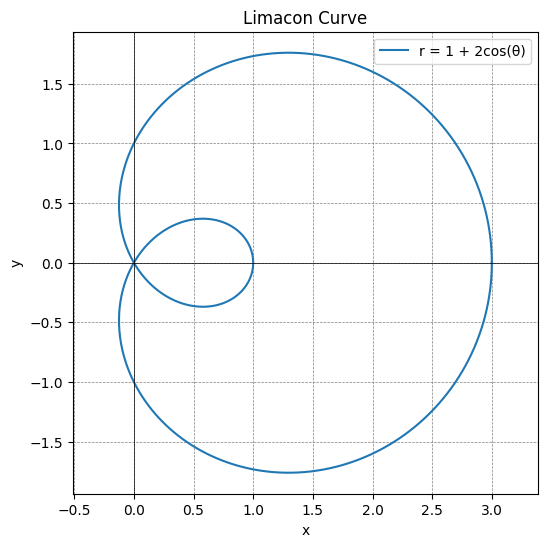

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# 리마콩 곡선의 파라미터
a = 1
b = 2

# 극좌표의 각도 θ 생성
theta = np.linspace(0, 2 * np.pi, 1000)

# 리마콩 곡선의 방정식
r = a + b * np.cos(theta)

# 극좌표를 데카르트 좌표로 변환
x = r * np.cos(theta)
y = r * np.sin(theta)

# 그래프 그리기
plt.figure(figsize=(6, 6))
plt.plot(x, y, label=f"r = {a} + {b}cos(θ)")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title("Limacon Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.show()

In [53]:
import matplotlib.pyplot as plt
import csv
import math
def rotate_vector(v, angle, anchor):
    """Rotate a vector `v` by the given angle, relative to the anchor point."""
    x, y = v

    x = float(x) - anchor[0]
    y = float(y) - anchor[1]
    # Here is a compiler optimization; inplace operators are slower than
    # non-inplace operators like above. This function gets used a lot, so
    # performance is critical.

    cos_theta = math.cos(math.radians(angle))
    sin_theta = math.sin(math.radians(angle))

    nx = x*cos_theta - y*sin_theta
    ny = x*sin_theta + y*cos_theta

    nx = nx + anchor[0]
    ny = ny + anchor[1]
    return [nx, ny]

x=[]
z=[]
x_rotate=[]
z_rotate=[]

f= open("data.csv")
#append values to list
for row in csv.reader(f):
    x.append(row[0])
    z.append(row[1])
    x_rotate.append(rotate_vector((row[0],row[1]),8,(0,0))[0])
    # rotate x to 8 angle
    z_rotate.append(rotate_vector((row[0],row[1]),8,(0,0))[1])
    # rotate z to 8 angle
plt.plot(x, z, 'r.')
plt.plot(x_rotate, z_rotate, 'r.')

plt.axis([-1, 30, -5,2])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'